In [1]:
#import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


In [3]:
#read the customer data 

In [4]:
data = pd.read_csv("Ecommerce Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.shape

(500, 8)

In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
len(data.Avatar.unique()), data.Avatar.unique()

(138,
 array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
        'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
        'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
        'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
        'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
        'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
        'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
        'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
        'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
        'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
        'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
        'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
        'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
        'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
        'DarkKhaki', 'Fir

In [10]:
#EDA

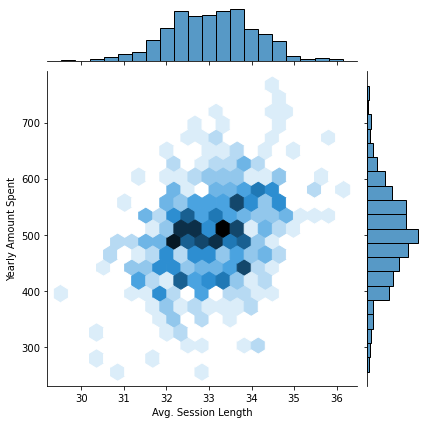

In [11]:
#analyse univariate and bivariate
sns.jointplot(x='Avg. Session Length',y ='Yearly Amount Spent', data = data,  kind = "hex")

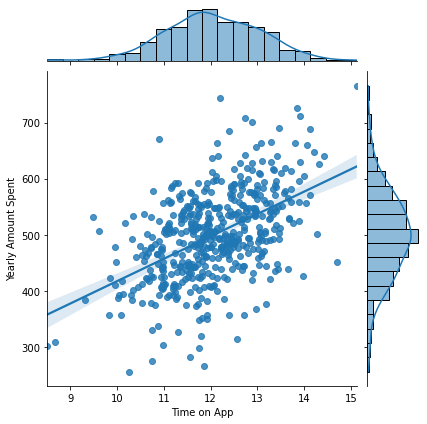

In [12]:
#Create jointplot to compare the Time on App column
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = data, kind = "reg")

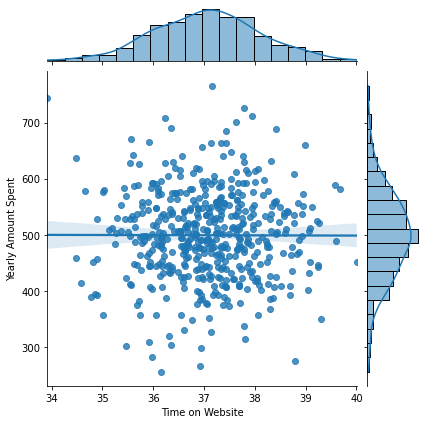

In [13]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = data, kind = "reg")

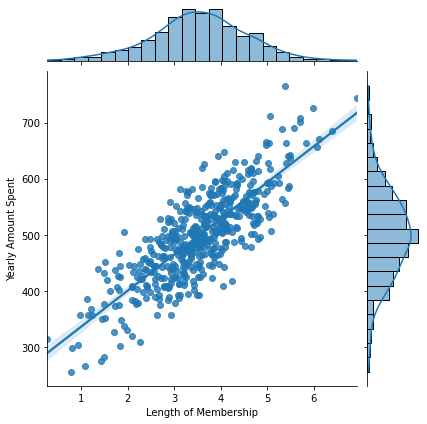

In [14]:
sns.jointplot(x='Length of Membership',y ='Yearly Amount Spent', data = data, kind = "reg")

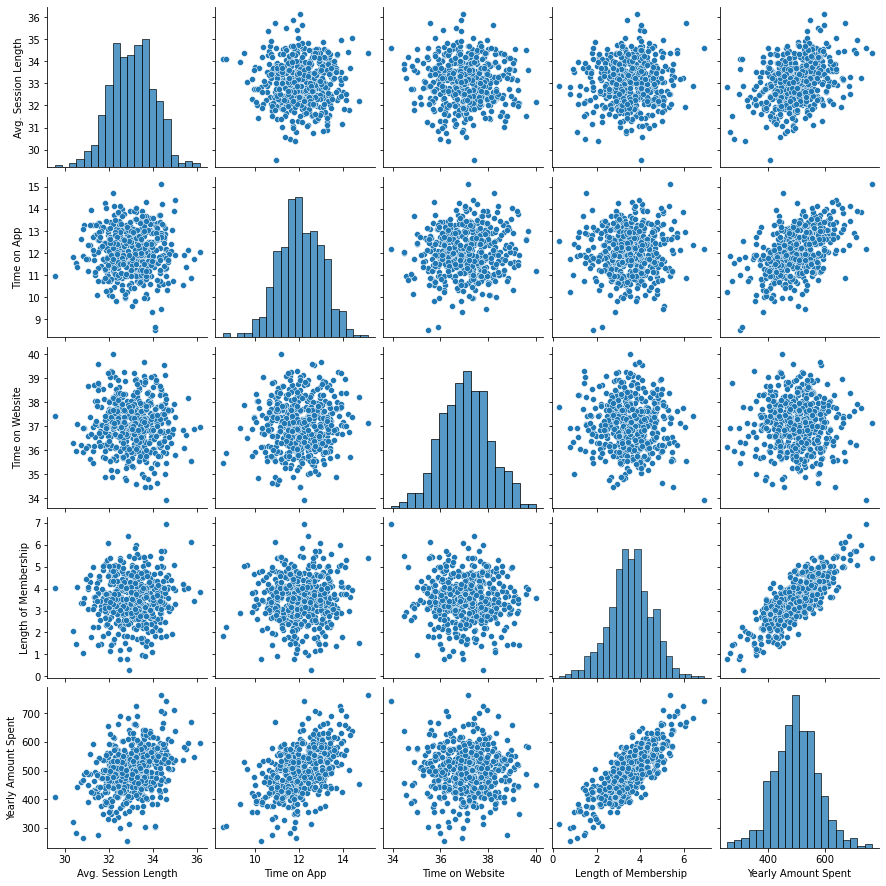

In [15]:
#correaltion between bivariate 
sns.pairplot(data)

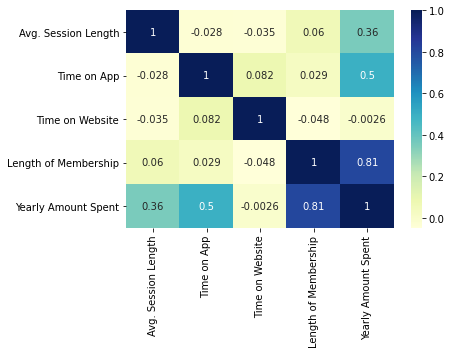

In [16]:
#heatmap correlation
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [17]:
#split the data 

In [18]:
X =  data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400,), (100,))

In [21]:
#this is where people confused to split the data wholesome. to cross validate we need both test and train data as well. So below wxample is totally wrong do not follow that
#X_train, cv_x_train, y_train, cv_y = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

#X_train.shape,  cv_x_train.shape,y_train.shape, cv_y.shape

In [22]:
#modeling the data

In [23]:
lm=LinearRegression()

<IPython.core.display.Javascript object>

In [24]:
lm=LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)
len(y_pred)
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

<IPython.core.display.Javascript object>

r2_score: 0.9778130629184126


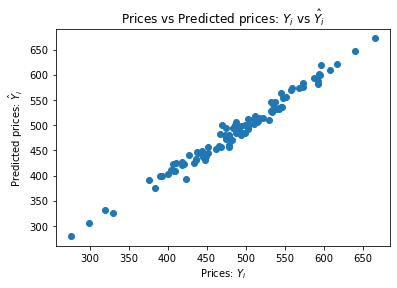

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

C:\Users\Dhivakar\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


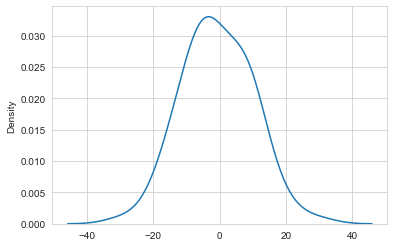

In [26]:
#checking the distribution of errors using prediction y_test -  y_pred

delta = y_test -  y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

C:\Users\Dhivakar\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


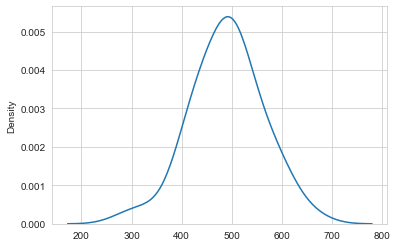

In [27]:
#checking the distribution of errors using actual y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=.5)
plt.show()

In [28]:
#applying min max scaling
#preprocessing and feature engineering to check the distribution before and after normalizing the data

from sklearn.preprocessing import MinMaxScaler

In [29]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
249,33.780157,11.917636,36.844734,3.634996
433,34.278248,11.822722,36.308545,2.117383
19,32.617856,13.989593,37.190504,4.064549
322,33.264632,10.732131,36.145792,4.086566
332,33.144234,11.737041,37.935189,2.190132
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [30]:
scaler = MinMaxScaler().fit(X_train)
print(scaler)
#model = model.transform(X_train)

MinMaxScaler()


In [31]:
scaler.data_min_, scaler.data_max_

(array([29.53242897,  8.50815218, 33.91384725,  0.26990109]),
 array([35.86023651, 15.12699429, 39.67259096,  6.92268934]))

In [32]:
X_train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,400.000000,400.000000,400.000000,400.000000
mean,33.061248,12.057716,37.020787,3.568064
std,0.987723,0.999140,1.017650,1.027884
min,29.532429,8.508152,33.913847,0.269901
25%,32.335151,11.393568,36.311681,2.956254
50%,33.102898,12.012108,37.041938,3.589728
75%,33.736793,12.759760,37.684273,4.142304
max,35.860237,15.126994,39.672591,6.922689


In [33]:
scaler.feature_range

(0, 1)

In [34]:
scaler.transform(X_train)

array([[0.67127955, 0.51511789, 0.50894548, 0.50581723],
       [0.74999419, 0.50077786, 0.41583689, 0.27770032],
       [0.48759813, 0.82815699, 0.56898808, 0.57038452],
       ...,
       [0.36032284, 0.35939353, 0.1708672 , 0.42970521],
       [0.43104097, 0.84980744, 0.53998444, 0.52491816],
       [0.45723077, 0.44429967, 0.63665677, 0.34828508]])

In [35]:
scaler = MinMaxScaler().fit(X_test)
scaler.transform(X_test)

array([[0.29311963, 0.19106667, 0.80066152, 0.60720969],
       [0.4203467 , 0.64840899, 0.38255692, 0.703379  ],
       [0.18346228, 0.14545818, 0.59266925, 0.7925604 ],
       [0.35784302, 0.76706062, 0.42559345, 0.49348397],
       [0.17339333, 0.31078054, 0.599106  , 0.60589525],
       [0.35459181, 0.84662029, 0.66295562, 0.6852507 ],
       [0.80819338, 0.4852006 , 0.12350374, 0.57851948],
       [0.45621121, 0.45283174, 0.49439621, 0.69936426],
       [0.35457778, 0.36856953, 0.51728616, 0.4561503 ],
       [0.4533565 , 0.30200464, 0.51051815, 0.6974873 ],
       [0.26857565, 0.46264004, 0.40615069, 0.55376468],
       [0.53359507, 0.38382768, 0.56478049, 0.40705756],
       [0.43019684, 0.51092623, 0.07891262, 0.36841632],
       [0.74172409, 0.18925076, 0.20102193, 0.82907901],
       [0.34997272, 0.4246466 , 0.60658193, 0.49928341],
       [0.5563932 , 0.30112073, 0.2037707 , 0.45717477],
       [0.49499458, 0.78714447, 0.25515931, 0.67916347],
       [0.4957325 , 0.55363478,

In [36]:
lm=LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

<IPython.core.display.Javascript object>

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

C:\Users\Dhivakar\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


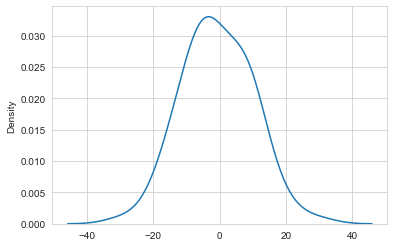

In [37]:
delta = y_test -  y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

In [38]:
#thus minmaxscaling has minute effect over error distribution

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm


def custom_metrics(y_test,y_pred):
    import sklearn.metrics as metrics
    
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('r2_score: {}'.format(r2_score(y_test, y_pred)),'\n')

    plt.scatter(y_test,y_pred)
    plt.xlabel('Predicted Value')
    plt.ylabel('Y - Test')
    plt.show()
"""
def custom_dis(y_test,y_pred):
     sns.distplot((y_test-y_pred))"""


def features_imp(importance):
    print(importance)
    x_la = X_train.columns
    plt.bar(x_la, importance)

    plt.xlabel("Features")
    plt.ylabel("Importance of the features")
    plt.title("Features importance bar plot")
    fig = plt.figure(figsize =(15, 7))
    plt.show()

This are the metrics for simple linear model
MAE: 8.558441885315247
MSE: 109.86374118394014
RMSE: 10.481590584636482
r2_score: 0.9778130629184126 



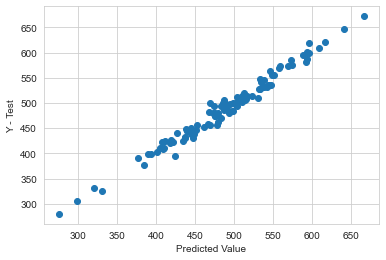

25.59625910043615


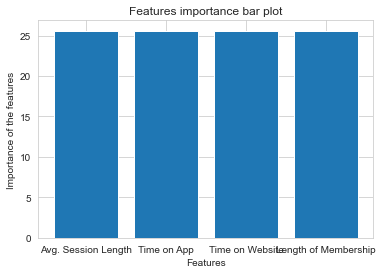

<Figure size 1080x504 with 0 Axes>

In [43]:
def simple_lm(X_train,X_test,y_train,y_test):
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
    import sklearn.linear_model as lm

    regressor = lm.LinearRegression() 

    regressor.fit(X_train, y_train)               # training the data on linear reg 
    y_pred = regressor.predict(X_test)            # predicting on test data set

    #print(y_pred)
    #print(np.array(y_test))
    print('This are the metrics for simple linear model')
    
    custom_metrics(y_test,y_pred)
    
    features_imp(regressor.coef_[0])
    

simple_lm(X_train,X_test,y_train,y_test)


This are the metrics for Lasso linear model
MAE: 8.558380083762009
MSE: 109.86254809117969
RMSE: 10.481533670755425
r2_score: 0.977813303863002 



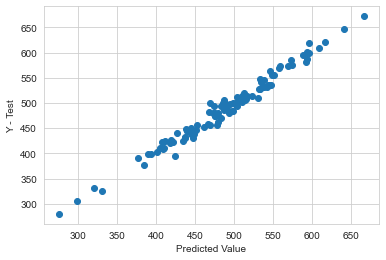

Followings are the best parameters =  {'alpha': 0.001}
25.596195621068347


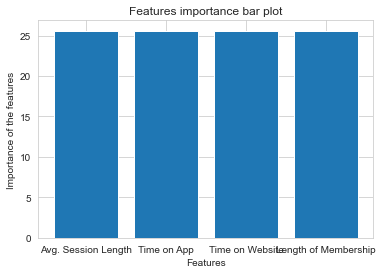

<Figure size 1080x504 with 0 Axes>

In [40]:
def lm_lasso(X_train,X_test,y_train,y_test):
    # https://scikit-learn.org/stable/modules/linear_model.html#lasso
    reg2 = lm.Lasso()

    c=np.linspace(0.001,1,10)
    #print(c,'parameters for alpha')
    parameters = {'alpha':c}

    clf = GridSearchCV(reg2, parameters)
    clf.fit(X_train,y_train)

    y_p1=clf.predict(X_test)

    print('This are the metrics for Lasso linear model')
    custom_metrics(y_test,y_p1)

    print('Followings are the best parameters = ',clf.best_params_)

    # features importance bar plot
    final_model = lm.Ridge(alpha=clf.best_params_['alpha'])
    final_model.fit(X_train,y_train)
    features_imp(final_model.coef_[0])
   


  

lm_lasso(X_train,X_test,y_train,y_test)

This are the metrics for Ridge linear model
MAE: 8.556285867544604
MSE: 109.81507035708087
RMSE: 10.479268598384186
r2_score: 0.9778228919717618 



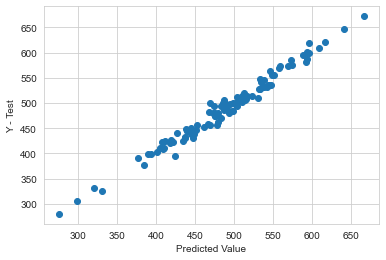

Followings are the best parameters =  {'alpha': 0.112}
25.58915137855634


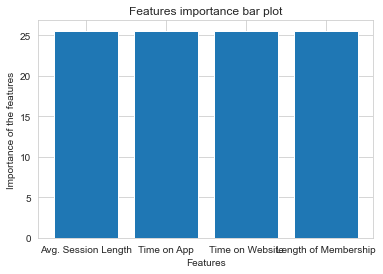

<Figure size 1080x504 with 0 Axes>

In [41]:
def lm_ridge(X_train,X_test,y_train,y_test):
    # https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification
    reg3 = lm.Ridge()

    c=np.linspace(0.001,1,10)
    #print(c,'parameters for alpha')
    parameters = {'alpha':c}

    clf1 = GridSearchCV(reg3, parameters)
    clf1.fit(X_train,y_train)

    y_p2=clf1.predict(X_test)
    print('This are the metrics for Ridge linear model')
    custom_metrics(y_test,y_p2)

    print('Followings are the best parameters = ',clf1.best_params_)

    # features importance bar plot
    final_model = lm.Ridge(alpha=clf1.best_params_['alpha'])
    final_model.fit(X_train,y_train)
    features_imp(final_model.coef_[0])


lm_ridge(X_train,X_test,y_train,y_test)

This are the metrics for elasticNet linear model
MAE: 8.556294978121443
MSE: 109.81788646025998
RMSE: 10.47940296296788
r2_score: 0.9778223232608898 



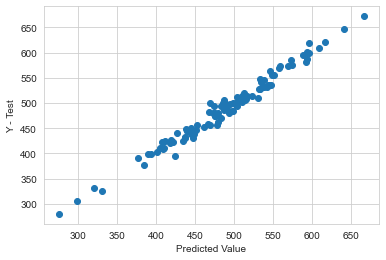

Followings are the best parameters =  {'alpha': 0.01, 'l1_ratio': 0.98}
[25.58122206 38.76909475  0.30130494 61.87669623]


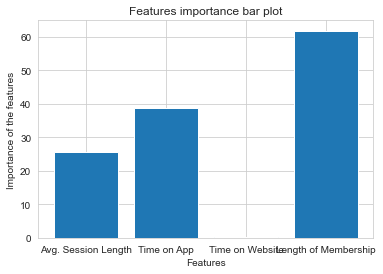

<Figure size 1080x504 with 0 Axes>

In [42]:
def lm_elastic(X_train,X_test,y_train,y_test):
    # https://machinelearningmastery.com/elastic-net-regression-in-python/

    from sklearn.model_selection import RepeatedKFold
    reg4 = lm.ElasticNet()

    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid = dict()
    grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
    grid['l1_ratio'] = np.arange(0, 1, 0.01)

    clf = GridSearchCV(reg4, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


    clf.fit(X_train,y_train)
    f = clf.predict(X_test)
    print('This are the metrics for elasticNet linear model')
    custom_metrics(y_test,f)

    print('Followings are the best parameters = ',clf.best_params_)

    # features importance bar plot
    final_model = lm.ElasticNet(alpha=clf.best_params_['alpha'],l1_ratio=clf.best_params_['l1_ratio'])
    final_model.fit(X_train,y_train)
    features_imp(final_model.coef_)
    

lm_elastic(X_train,X_test,y_train,y_test)